# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
import requests

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print("City URL:", city_url)  # Print the constructed city URL

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract required weather information
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
City URL: https://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 2 of Set 1 | novodvinsk
City URL: https://api.openweathermap.org/data/2.5/weather?q=novodvinsk&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 3 of Set 1 | stanley
City URL: https://api.openweathermap.org/data/2.5/weather?q=stanley&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 4 of Set 1 | olonkinbyen
City URL: https://api.openweathermap.org/data/2.5/weather?q=olonkinbyen&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 5 of Set 1 | ushuaia
City URL: https://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 6 of Set 1 | fuxin
City URL: https://api.openweathermap.org/data/2.5/weather?q=fuxin&appid=f5f736c3000f7563cb1e10bf0e02defd
Processing Record 7 of Set 1 | ancud
City URL: htt

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,276.09,72,13,5.32,GS,1707083260
1,novodvinsk,64.4165,40.8122,264.01,93,100,4.25,RU,1707083260
2,stanley,54.8680,-1.6985,285.11,77,75,12.86,GB,1707083261
3,olonkinbyen,70.9221,-8.7187,267.38,77,100,11.88,SJ,1707083261
4,ushuaia,-54.8000,-68.3000,288.96,67,75,2.06,AR,1707082963


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,276.09,72,13,5.32,GS,1707083260
1,novodvinsk,64.4165,40.8122,264.01,93,100,4.25,RU,1707083260
2,stanley,54.8680,-1.6985,285.11,77,75,12.86,GB,1707083261
3,olonkinbyen,70.9221,-8.7187,267.38,77,100,11.88,SJ,1707083261
4,ushuaia,-54.8000,-68.3000,288.96,67,75,2.06,AR,1707082963


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

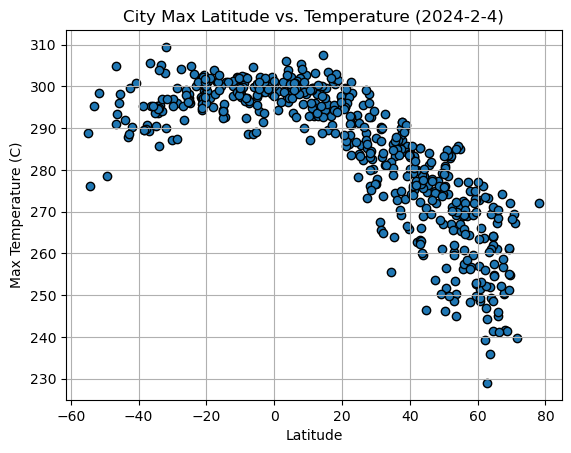

In [54]:
# Build scatter plot for latitude vs. temperature
latitude = [city["Lat"] for city in city_data]
max_temperature = [city["Max Temp"] for city in city_data]
plt.scatter(latitude, max_temperature, edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-2-4)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

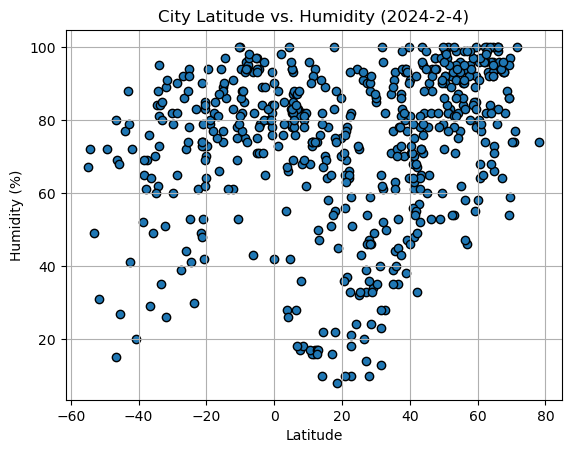

In [55]:
# Build the scatter plots for latitude vs. humidity
latitude = [city["Lat"] for city in city_data]
humidity = [city["Humidity"] for city in city_data]
plt.scatter(latitude, humidity, edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-2-4)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

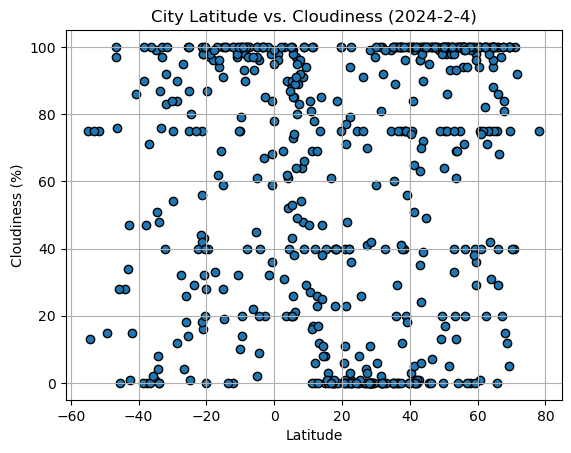

In [57]:
# Build the scatter plots for latitude vs. cloudiness
latitude = [city["Lat"] for city in city_data]
cloudiness = [city["Cloudiness"] for city in city_data]
plt.scatter(latitude, cloudiness, edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-2-4)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

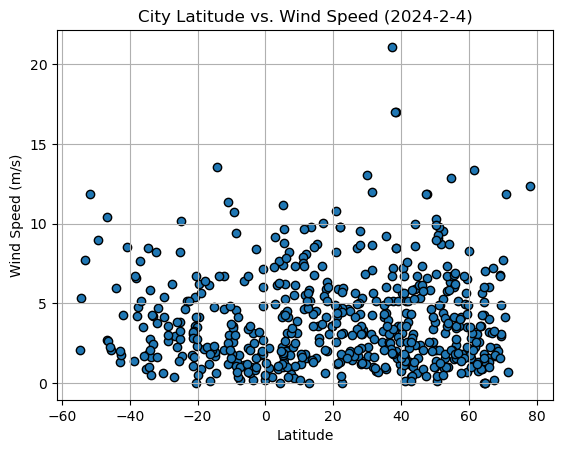

In [58]:
# Build the scatter plots for latitude vs. wind speed
latitude = [city["Lat"] for city in city_data]
wind_speed = [city["Wind Speed"] for city in city_data]
plt.scatter(latitude, wind_speed, edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-2-4)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print r value
    print(f"The r-value is: {rvalue}")

    # Show plot
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,novodvinsk,64.4165,40.8122,264.01,93,100,4.25,RU,1707083260
2,stanley,54.8680,-1.6985,285.11,77,75,12.86,GB,1707083261
3,olonkinbyen,70.9221,-8.7187,267.38,77,100,11.88,SJ,1707083261
5,fuxin,42.0156,121.6589,262.71,67,100,3.85,CN,1707083262
7,albany,42.6001,-73.9662,276.38,57,1,1.34,US,1707083263


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,276.09,72,13,5.32,GS,1707083260
4,ushuaia,-54.8000,-68.3000,288.96,67,75,2.06,AR,1707082963
6,ancud,-41.8697,-73.8203,290.21,72,15,4.29,CL,1707083263
9,minas de marcona,-15.2119,-75.1103,294.44,74,59,4.75,PE,1707083264
10,port-aux-francais,-49.3500,70.2167,278.50,72,15,8.98,TF,1707083264


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8564817767812434


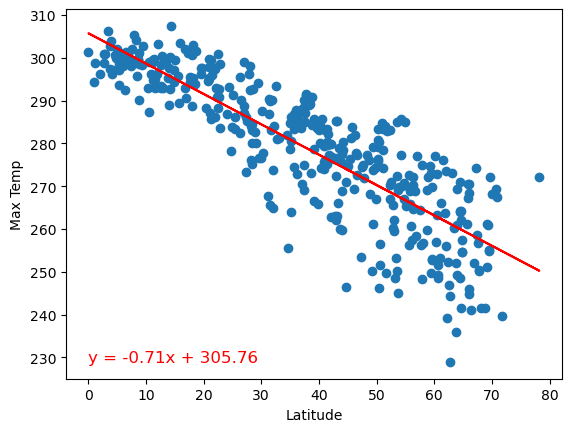

In [80]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.39918283239340846


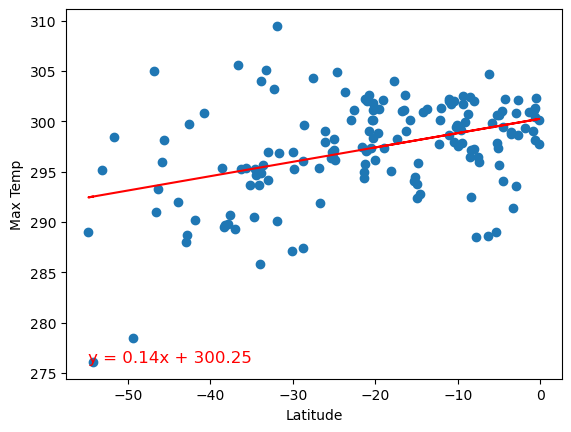

In [81]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** In the northern hemisphere, max temperature is negatively correlated to latitude. In the southern hemisphere, max temperature is positively correlated to latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3741738004354701


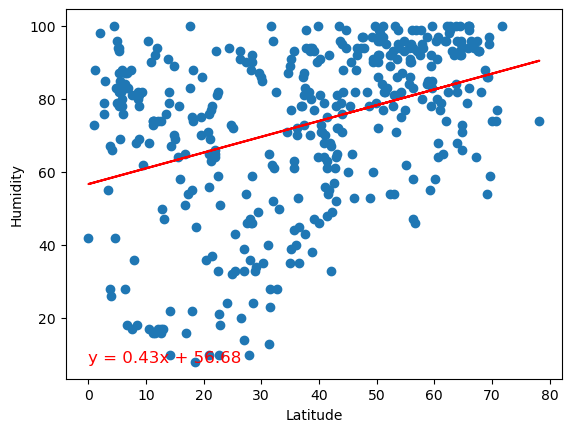

In [82]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: 0.46415687713238957


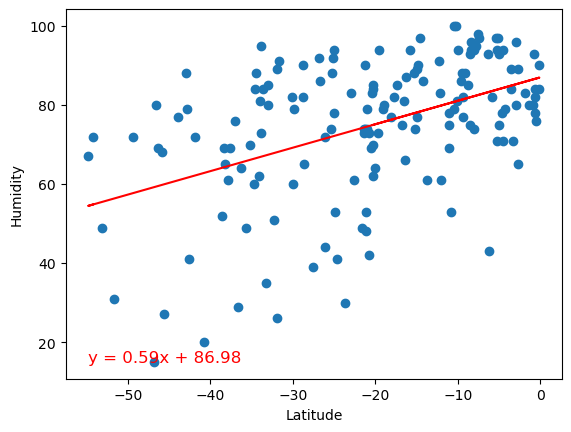

In [83]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** In both hemispheres, humidity is positively correlated to latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2604332795656387


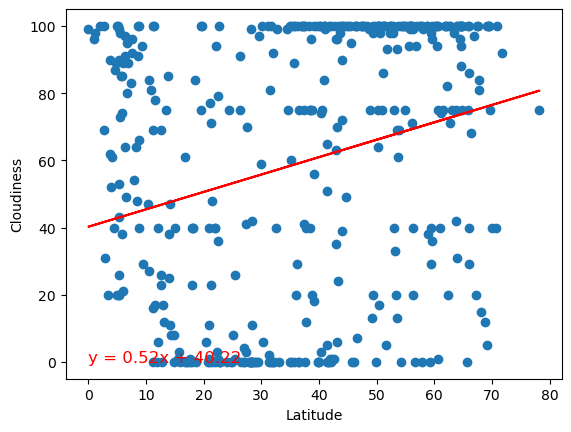

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: 0.25915302534078605


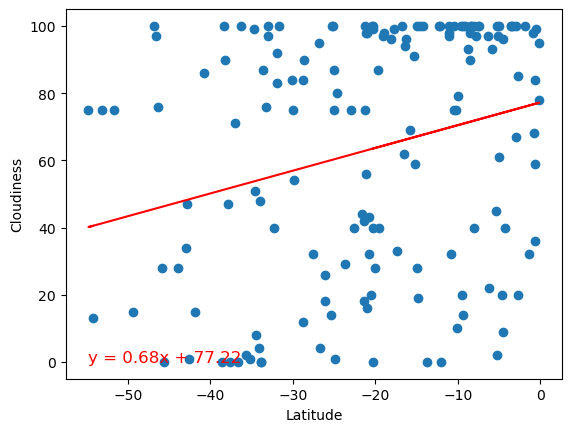

In [85]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** In both hemispheres, cloudiness is positively correlated to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03377574623556294


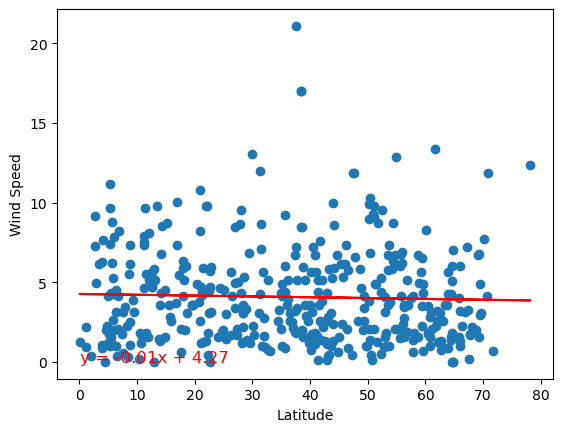

In [88]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.22811520703906268


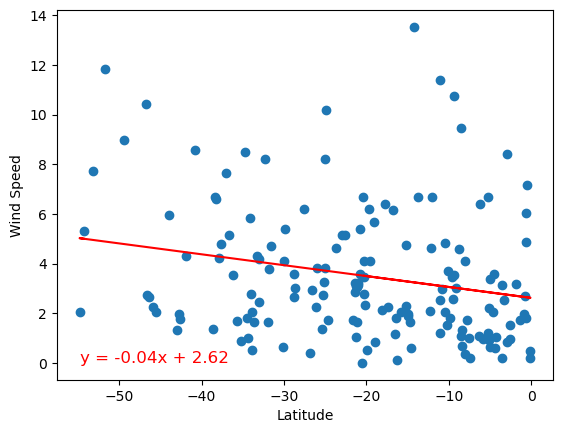

In [89]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** In the northern hemisphere, there is little correlation between wind speed and latitude. In the southern hemisphere, as latitude increases wind speed decreases.